In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import glob
import math

In [56]:
imagefiles=glob.glob(r'C:\Users\HP\My Python stuff\openCV\turbidimeter images\IMG_20220922*')
imagefiles.sort()
images=[]
for filename in imagefiles:
  img=cv2.imread(filename)
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  images.append(img)
num_images=len(images)

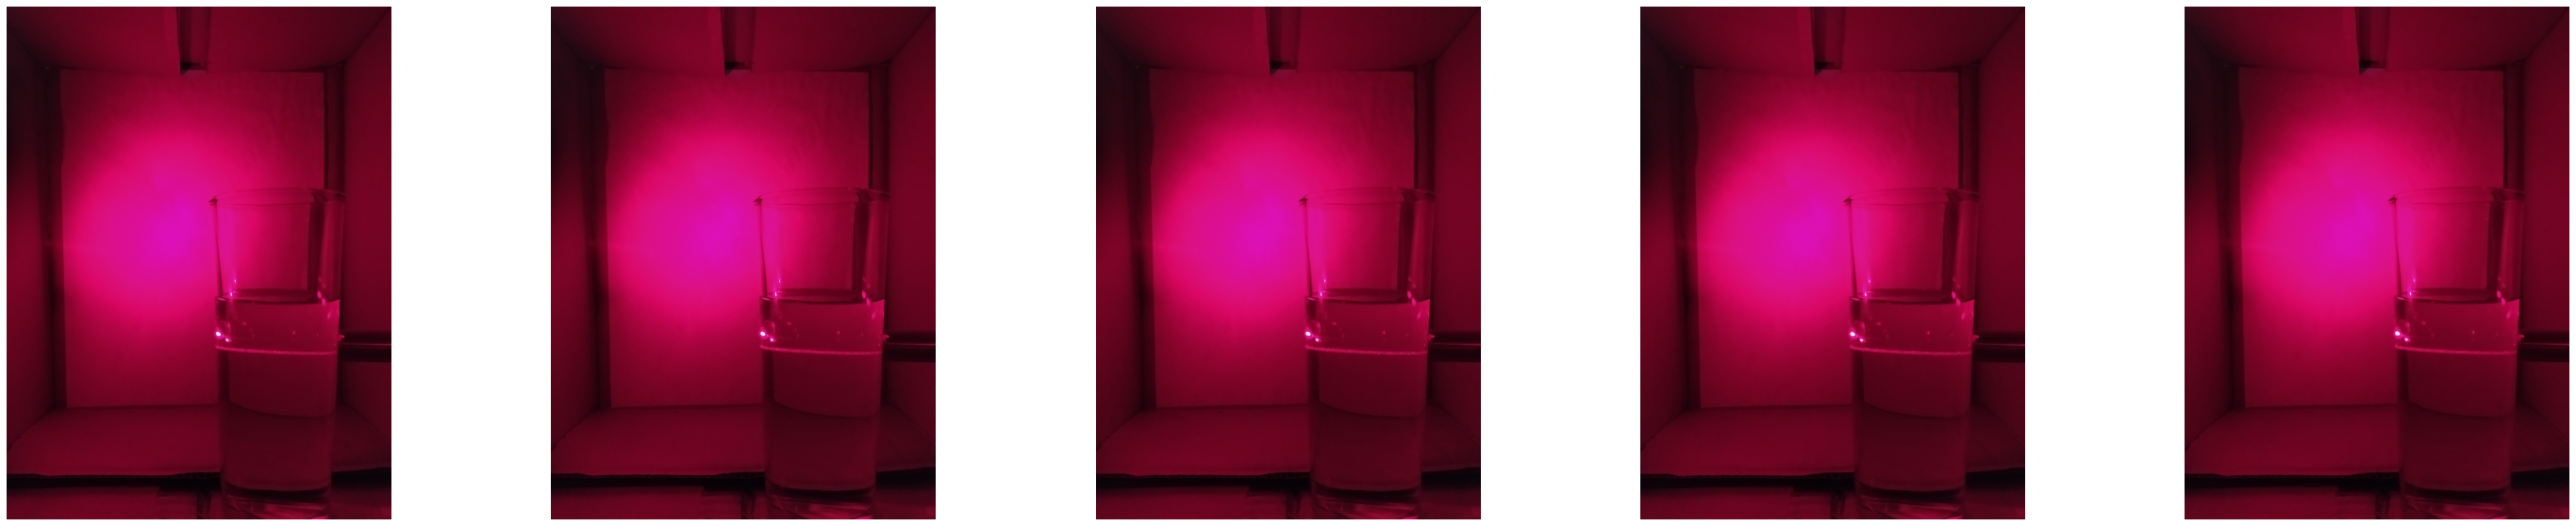

In [57]:
plt.figure(figsize=[50,10]) 
num_cols=5
num_rows=math.ceil(num_images / num_cols)
for i in range(0, num_images):
  plt.subplot(num_rows, num_cols, i+1) 
  plt.axis('off')
  plt.imshow(images[i])

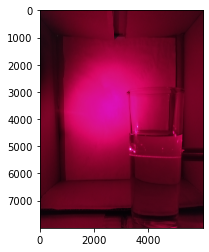

In [73]:
merge_mertens=cv2.createMergeMertens()
stackimg=merge_mertens.process(images)
stackimg=np.clip(stackimg, 0,1).astype('float32')
plt.imshow(stackimg)

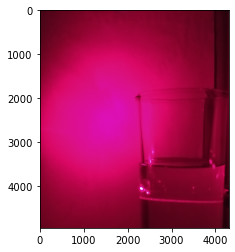

In [74]:
inimg=stackimg[1050:6000,1000:5300]
plt.imshow(inimg)

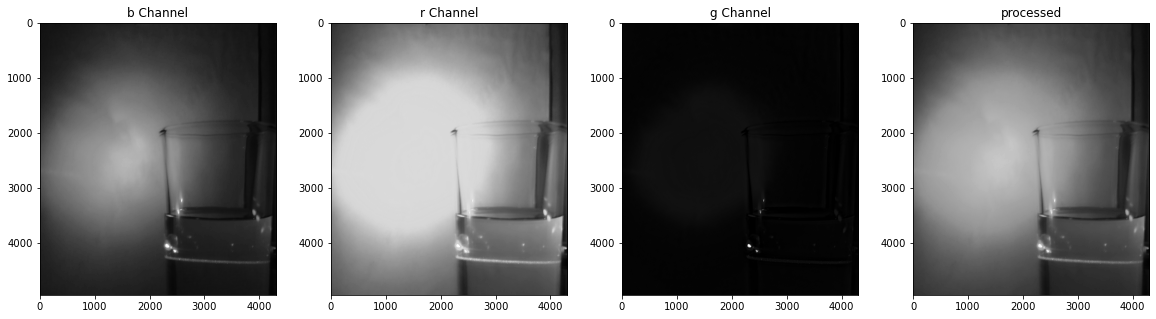

In [75]:
ginimg=cv2.cvtColor(inimg,cv2.COLOR_RGB2GRAY)
red,green,blue=cv2.split(inimg)
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(blue,cmap='gray');plt.title("b Channel");
plt.subplot(142);plt.imshow(red,cmap='gray');plt.title("r Channel");
plt.subplot(143);plt.imshow(green,cmap='gray');plt.title("g Channel");
plt.subplot(144);plt.imshow(pinimg,cmap='gray');plt.title("processed");

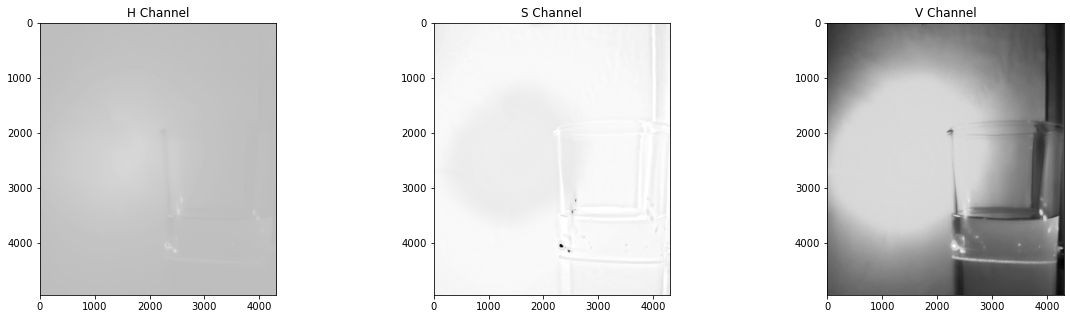

In [76]:
img_hsv= cv2.cvtColor(inimg, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img_hsv)

plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(132);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(133);plt.imshow(v,cmap='gray');plt.title("V Channel");

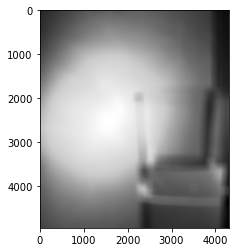

In [150]:
merge_mertens=cv2.createMergeMertens()
pinimg=merge_mertens.process([red,blue,v])
pinimg=np.clip(pinimg, 0,1).astype('float32')
pinimg=cv2.boxFilter(pinimg,-1,(200,200), normalize=True)
plt.imshow(pinimg,cmap="gray")

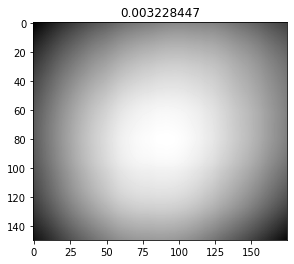

In [151]:
maxbri=pinimg[2350:2700,1400:1700]
maxbri=maxbri[100:250,75:250]
maxbrival=np.mean(maxbri)
plt.imshow(maxbri,cmap="gray");plt.title(maxbrival);

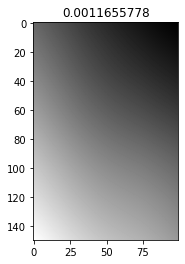

In [152]:
minbri=pinimg[0:1000,3000:3500]
minbri=minbri[150:450,250:800]
minbri=minbri[0:250,50:400]
minbri=minbri[0:200,50:400]
minbri=minbri[0:150,50:400]
minbrival=np.mean(minbri)
plt.imshow(minbri,cmap="gray");plt.title(minbrival);

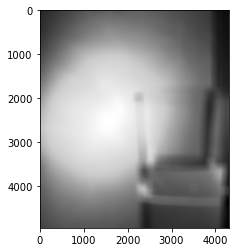

In [153]:
matrix=np.ones(pinimg.shape,dtype="float32")*minbrival
pinimg=pinimg-matrix
plt.imshow(pinimg,cmap="gray")

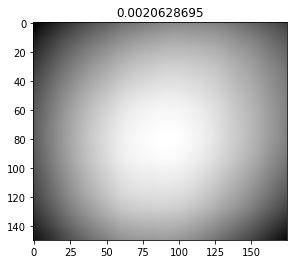

In [154]:
maxbri=pinimg[2350:2700,1400:1700]
maxbri=maxbri[100:250,75:250]
maxbrival=np.mean(maxbri)
plt.imshow(maxbri,cmap="gray");plt.title(maxbrival);

[[0.00116558 0.00116558 0.00116558 ... 0.00116558 0.00116558 0.00116558]
 [0.00116558 0.00116558 0.00116558 ... 0.00116558 0.00116558 0.00116558]
 [0.00116558 0.00116558 0.00116558 ... 0.00116558 0.00116558 0.00116558]
 ...
 [0.00116558 0.00116558 0.00116558 ... 0.00116558 0.00116558 0.00116558]
 [0.00116558 0.00116558 0.00116558 ... 0.00116558 0.00116558 0.00116558]
 [0.00116558 0.00116558 0.00116558 ... 0.00116558 0.00116558 0.00116558]]


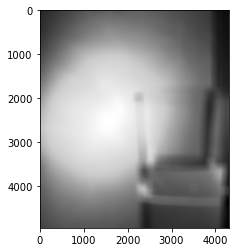

In [155]:
matrix1=np.ones(pinimg.shape,dtype="float32")*(1/maxbrival)
print(matrix)
pinimg=pinimg*matrix1
pinimg=cv2.normalize(pinimg,None,0,1,cv2.NORM_MINMAX)
plt.imshow(pinimg,cmap="gray")

AttributeError: 'numpy.ndarray' object has no attribute 'png'

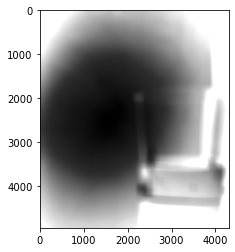

In [195]:
maxbri=pinimg[2350:2700,1400:1700]
maxbri=maxbri[100:250,75:250]
maxbrival=np.mean(maxbri)
prinimg=(pinimg/maxbrival)
minbri=prinimg[0:1000,3000:3500]
minbri=minbri[150:450,250:800]
minbri=minbri[0:250,50:400]
minbri=minbri[0:200,50:400]
minbri=minbri[0:150,50:400]
minbrival=np.mean(minbri)
prinimg[prinimg<minbrival]=minbrival
projection=-np.log(prinimg)
plt.imshow(projection,cmap="gray")
cv2.imwrite(projection.png,projection)

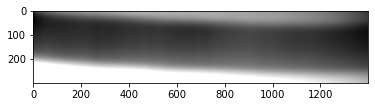

In [194]:
cprojection=projection[4200:4500,2600:4000]
plt.imshow(cprojection,cmap="gray")

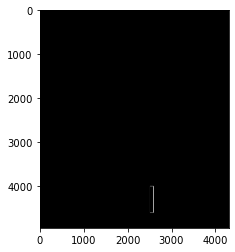